In [1]:
# Schwefel_221
# In the paper Ngen=5000  NPAR=100 dim=30
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=5000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100 # NUMBER OF PARTICLES
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

#TOTAL=ITE

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel_221'
Fun=Function.Schwefel_221

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [5]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [6]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [7]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [8]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [9]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [10]:
#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR



dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO

 




In [11]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
     

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      Maior=np.argmax(Fitness)
      Menor=np.argmin(Fitness)

    print('ite=',i,'total=50','time=',delta_time,'Fbest',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 1.672506332397461e-05 Fbest 0.235621118476
ite= 1 total=50 time= 7.511844412485758 Fbest 0.207862873021
ite= 2 total=50 time= 14.934990465641022 Fbest 0.203705961452
ite= 3 total=50 time= 27.251765330632526 Fbest 0.22435527465
ite= 4 total=50 time= 33.87346178293228 Fbest 0.209253748937
ite= 5 total=50 time= 39.88224700291951 Fbest 1.98733736926e-07
ite= 6 total=50 time= 45.77862807512283 Fbest 0.189329032596
ite= 7 total=50 time= 51.71321254968643 Fbest 0.228654032114
ite= 8 total=50 time= 57.62709378004074 Fbest 0.206944266948
ite= 9 total=50 time= 63.77288380066554 Fbest 0.198769730223
ite= 10 total=50 time= 69.91251928011576 Fbest 0.230222551861
ite= 11 total=50 time= 75.96641113758088 Fbest 0.219382255128
ite= 12 total=50 time= 81.89610578219096 Fbest 0.223330352137
ite= 13 total=50 time= 87.7491998831431 Fbest 0.188236864462
ite= 14 total=50 time= 93.57184450229009 Fbest 0.232310881718
ite= 15 total=50 time= 99.40563835700353 Fbest 0.215185568611
ite= 16 tot

In [12]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [13]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         3.126137e+02  9.981695e-01  0.000133         0.0      0.0  100.0   
1         3.113923e+02  9.942694e-01  0.000267         0.0      0.0  100.0   
2         3.106453e+02  9.918843e-01  0.000400         0.0      0.0  100.0   
3         3.090701e+02  9.868549e-01  0.000533         0.0      0.0  100.0   
4         3.071019e+02  9.805703e-01  0.000667         0.0      0.0  100.0   
5         3.068528e+02  9.797749e-01  0.000800         0.0      0.0  100.0   
6         3.062659e+02  9.779009e-01  0.000933         0.0      0.0  100.0   
7         3.057088e+02  9.761221e-01  0.001067         0.0      0.0  100.0   
8         3.048978e+02  9.735327e-01  0.001200         1.0      2.0  100.0   
9         3.040670e+02  9.708799e-01  0.001333         0.0      0.0  100.0   
10        3.028437e+02  9.669739e-01  0.001467         0.0      0.0  100.0   
11        3.025611e+02  9.660718e-01  0.001600         0.0      

In [14]:
print(NPAR)

100


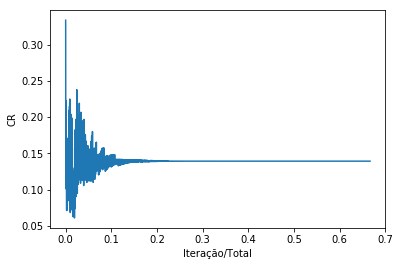

In [15]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

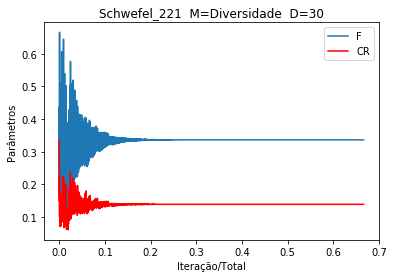

In [16]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


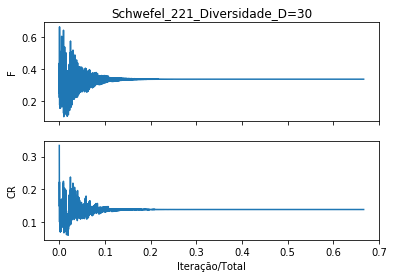

In [17]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [18]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)


DE_POP_VAR_F_CR TOTAL= 750000 Iterações= 5000 Dim= 30 Min/Max= -100 / 100 _ Schwefel_221
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-5000 

MÉDIA:  0.200534536757
MIN __: 1.98733736926e-07
MAX__:  0.288655993567
STD __: 0.0408894049212
Tempo Médio= 408.175 segundos ---
50 Rodadas

BEST:  [ -1.01476387e-08  -8.98127724e-08  -1.49957554e-07  -1.58856447e-07
   7.69702992e-08  -1.20440889e-07  -4.61877145e-08   8.81562839e-08
   1.96601995e-07   1.59173006e-07  -2.10010506e-08  -1.98733737e-07
   1.69810685e-07   8.10748224e-08  -8.55250350e-08   1.00451143e-07
   1.69417476e-07  -1.94910654e-07   1.05279689e-07  -1.02703510e-07
  -1.35408226e-07   1.18095513e-07  -1.99540057e-10  -1.18439580e-07
   1.96442309e-07  -1.94190838e-08  -1.04139541e-07  -5.20015670e-08
  -3.52130360e-08  -1.95927909e-07   1.98733737e-07]


In [19]:
print(pd.DataFrame(XY))

          0         1         2         3         4         5         6   \
0  -0.140583 -0.191563  0.045108 -0.065561 -0.163850 -0.183797  0.025678   
1  -0.108011  0.062181  0.131602  0.036512 -0.199719 -0.086583 -0.020243   
2   0.027610  0.207212  0.094602  0.085811 -0.072928 -0.125870  0.169293   
3   0.173319  0.088798  0.105620  0.150886  0.108050  0.135576 -0.119932   
4   0.192986  0.021038  0.025770 -0.135554 -0.209284 -0.202599 -0.150589   
5  -0.077015 -0.154585 -0.041058 -0.187212  0.224021 -0.166096  0.023614   
6   0.082724  0.195020  0.067896 -0.098649 -0.024786 -0.115070 -0.062475   
7   0.234031 -0.013807 -0.110133 -0.175572  0.158802 -0.226941  0.219301   
8  -0.112548 -0.209635 -0.162515 -0.184671 -0.116969 -0.126654  0.174248   
9  -0.232174  0.185007  0.067414  0.110173  0.089439 -0.144701 -0.207163   
10 -0.190624  0.200229  0.237375 -0.000752 -0.240180 -0.069790 -0.236597   
11  0.057928 -0.015978 -0.178442 -0.064371  0.008175 -0.190401  0.066377   
12 -0.227921

In [20]:
print(X)

[[-0.0770154  -0.15458516 -0.04105818 ...,  0.00297062  0.11727018
   0.16662556]
 [-0.18282988 -0.31173514  0.25821303 ...,  0.22519574  0.14441068
   0.28999021]
 [-0.23071223 -0.27939446 -0.15640722 ...,  0.15952946  0.16869327
  -0.19399556]
 ..., 
 [ 0.02395048  0.18954412 -0.15728673 ...,  0.31015679  0.13544694
   0.03356152]
 [ 0.23403064 -0.01380653 -0.1101334  ...,  0.0933702  -0.17985474
   0.17239651]
 [-0.15079433 -0.21205251  0.04424354 ...,  0.28132467  0.20553617
   0.11858517]]
